# importing Data and modules


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

In [28]:
df = pd.read_csv(
    r"/home/ahmed/Ai/Ml-algorithms-from-scratch-and-scikit-learn-in-python-/DataSets/processed.cleveland.data",
    header=None,
)
df.columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "hd",
]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [29]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [30]:
list(df["ca"].unique()), list(df["thal"].unique())
(df["ca"].value_counts()), (df["thal"].value_counts())

(ca
 0.0    176
 1.0     65
 2.0     38
 3.0     20
 ?        4
 Name: count, dtype: int64,
 thal
 3.0    166
 7.0    117
 6.0     18
 ?        2
 Name: count, dtype: int64)

In [31]:
len(df)

303

# Missing data


In [32]:
df = df[(df["ca"] != "?") & ((df["thal"] != "?"))]
len(df)

297

In [33]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

# One hot Encode

### We have 4 categorical columns:

    cp, restecg, slope, thal


In [34]:
features = df.drop("hd", axis="columns")
test = df["hd"]

In [35]:
features_encoded = pd.get_dummies(features, columns=["cp", "restecg", "slope", "thal"])
features_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,False,...,True,True,False,False,False,True,False,False,False,True
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,True,...,False,True,False,False,False,True,False,False,False,True
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,False,...,True,True,False,False,False,True,False,False,False,True
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,False,...,True,True,False,False,False,True,False,False,False,True


In [36]:
test.value_counts()

hd
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [37]:
non_zero_test = test > 0
test[non_zero_test] = 1
test.value_counts()

/tmp/ipykernel_222260/46895302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[non_zero_test] = 1
/tmp/ipykernel_222260/46895302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[non_zero_test] = 1


hd
0    160
1    137
Name: count, dtype: int64

# Spliting data


In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    features_encoded, test, random_state=42
)

# build a Decision Tree Classifier


In [39]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

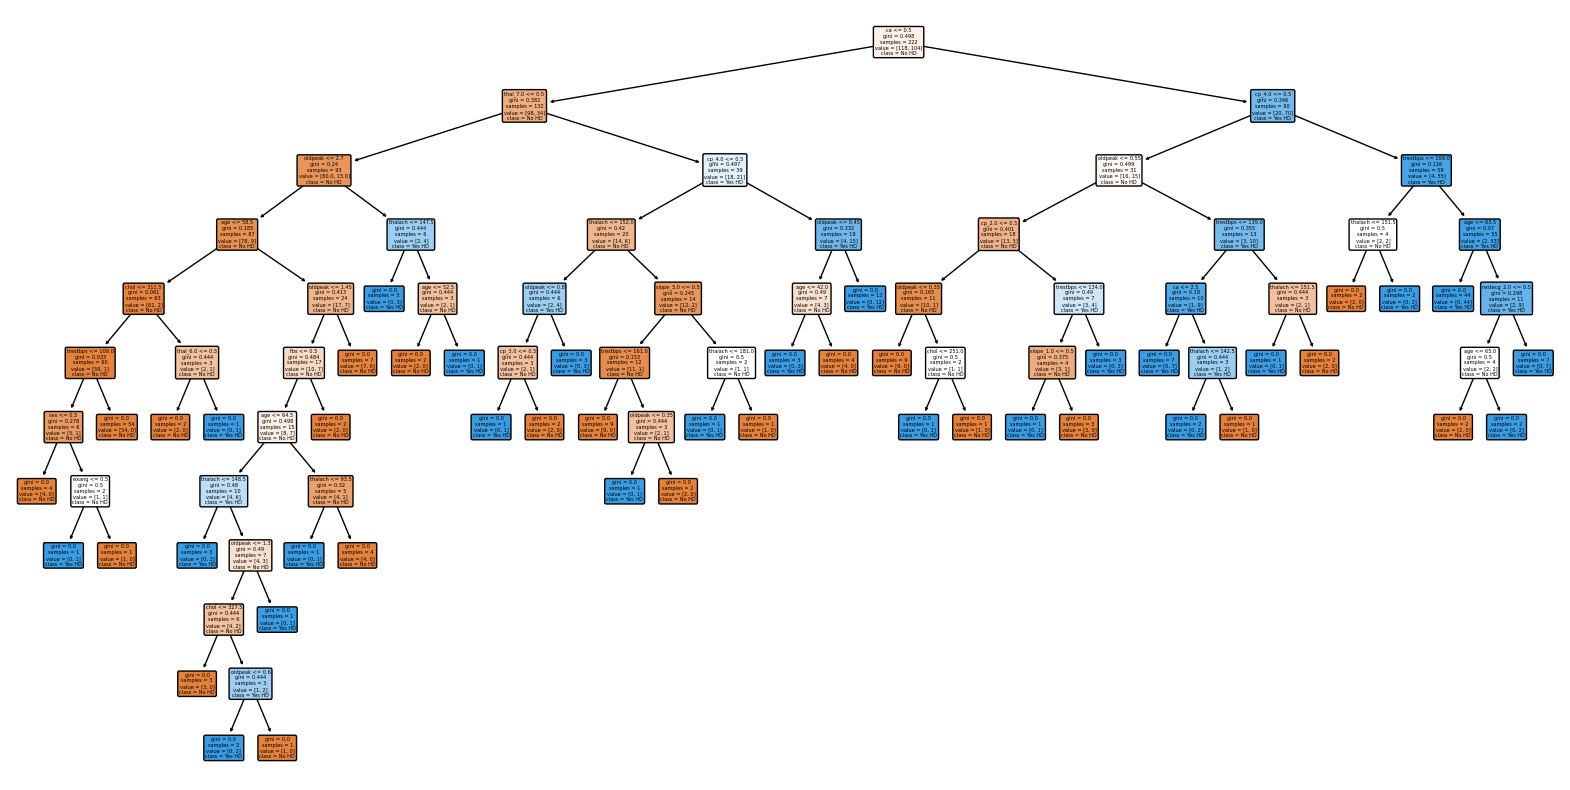

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(
    DTC,
    class_names=["No HD", "Yes HD"],
    filled=True,
    rounded=True,
    feature_names=features_encoded.columns,
)
plt.show()

In [41]:
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.76)

# Trting to purned the tree and improve the score


In [42]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models.append(DTC)

In [43]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]

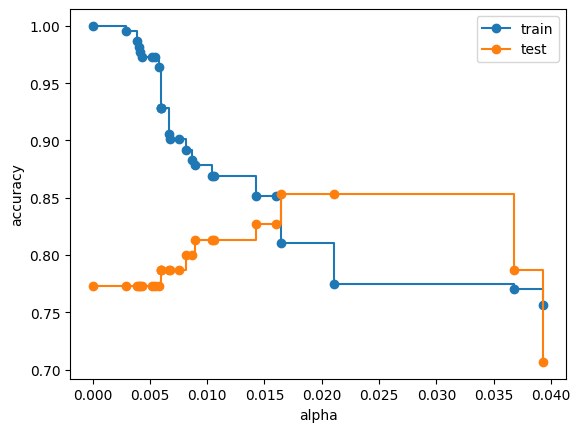

In [44]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

<Axes: xlabel='tree'>

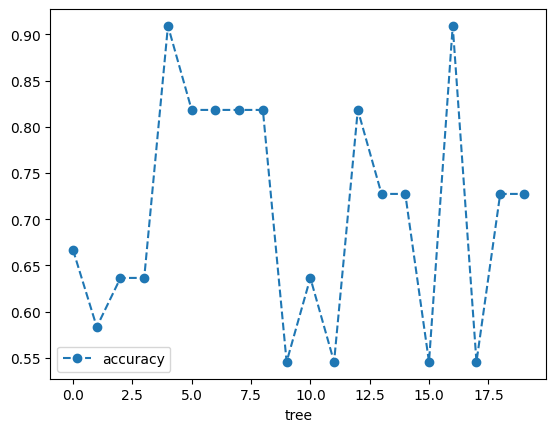

In [45]:
DTC = DecisionTreeClassifier(ccp_alpha=0.016, random_state=42)
score = cross_val_score(DTC, x_train, y_train, cv=20)
df_ = pd.DataFrame(data={"tree": range(20), "accuracy": score})

df_.plot(x="tree", y="accuracy", linestyle="--", marker="o")

<Axes: xlabel='alpha'>

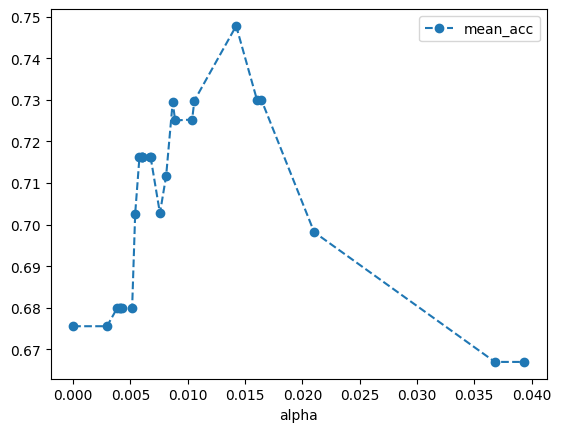

In [46]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    score = cross_val_score(DTC, x_train, y_train, cv=5)
    models.append([alpha, np.mean(score), np.std(score)])

alpha_results = pd.DataFrame(models, columns=["alpha", "mean_acc", "std"])

alpha_results.plot(x="alpha", y="mean_acc", linestyle="--", marker="o")

# now the best alpha is .014


In [47]:
alpha = alpha_results[
    (alpha_results["alpha"] < 0.015) & (alpha_results["alpha"] > 0.014)
]["alpha"]
alpha

20    0.014225
Name: alpha, dtype: float64

In [48]:
alpha = float(alpha)
alpha

/tmp/ipykernel_222260/724424126.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  alpha = float(alpha)


0.014224751066856332

In [49]:
DTC_pruned = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
DTC_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

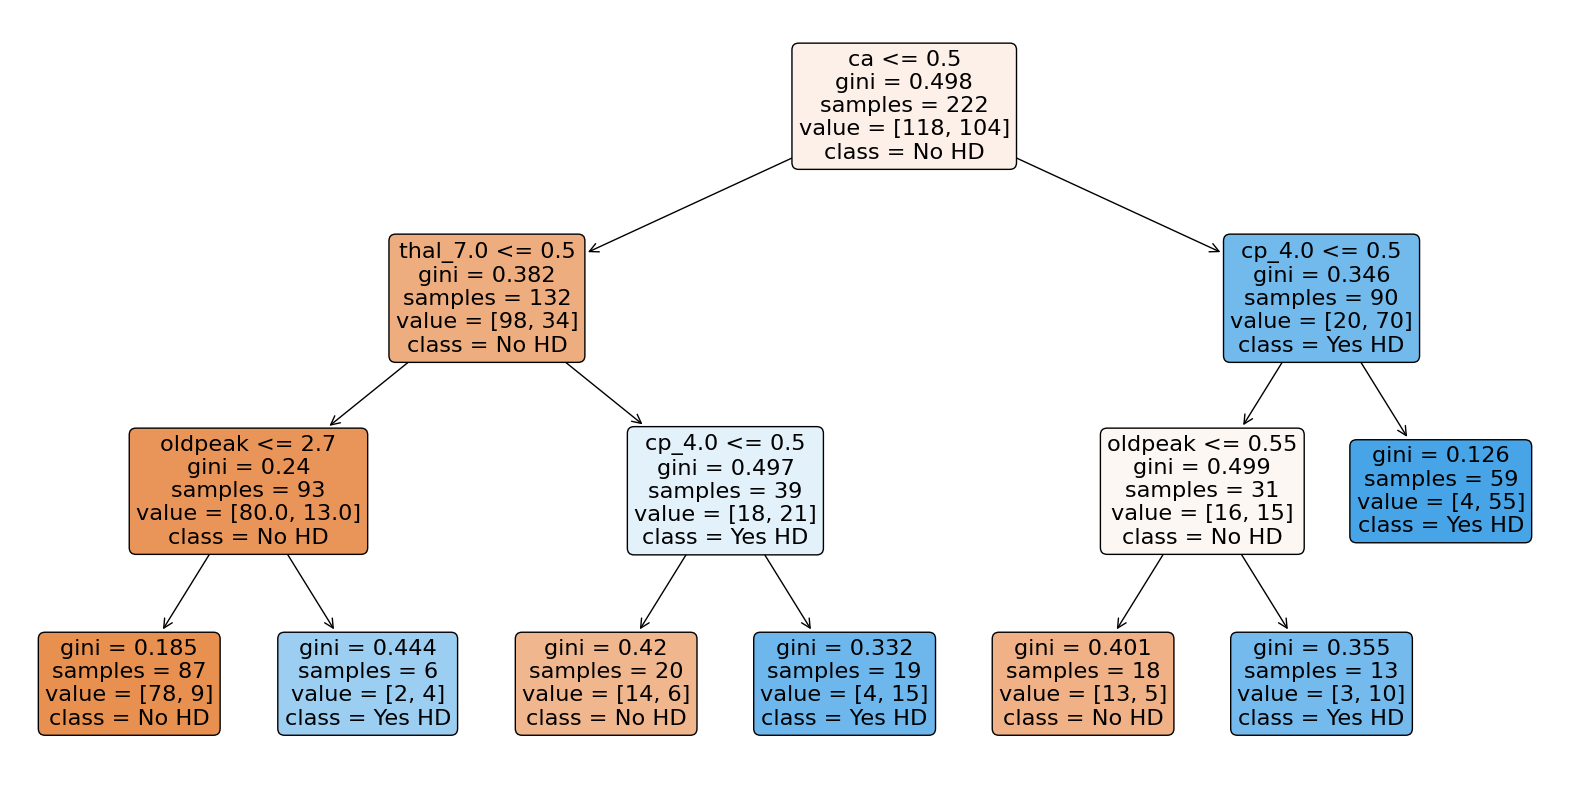

In [50]:
plt.figure(figsize=(20, 10))
plot_tree(
    DTC_pruned,
    class_names=["No HD", "Yes HD"],
    filled=True,
    rounded=True,
    feature_names=features_encoded.columns,
)
plt.show()

### the difference between the tree model above and the first tree is very very huge


In [51]:
DTC_pruned.score(x_train, y_train), DTC_pruned.score(x_test, y_test)

(0.8513513513513513, 0.8266666666666667)

# End up with a comparison of two models


# accuracy with out pruned

    (1.0, 0.76)

# accuracy with pruned

    (0.8513513513513513, 0.8266666666666667)
